In [1]:
import cv2 as cv
from correct_exposure import CorrectExposure
from ocr_tool import OCRTool

In [2]:
img = cv.imread('../../image/IS/income_statement_standard_007_shawdow_test_001.jpg',cv.IMREAD_GRAYSCALE)

In [3]:
ocr_tool = OCRTool()

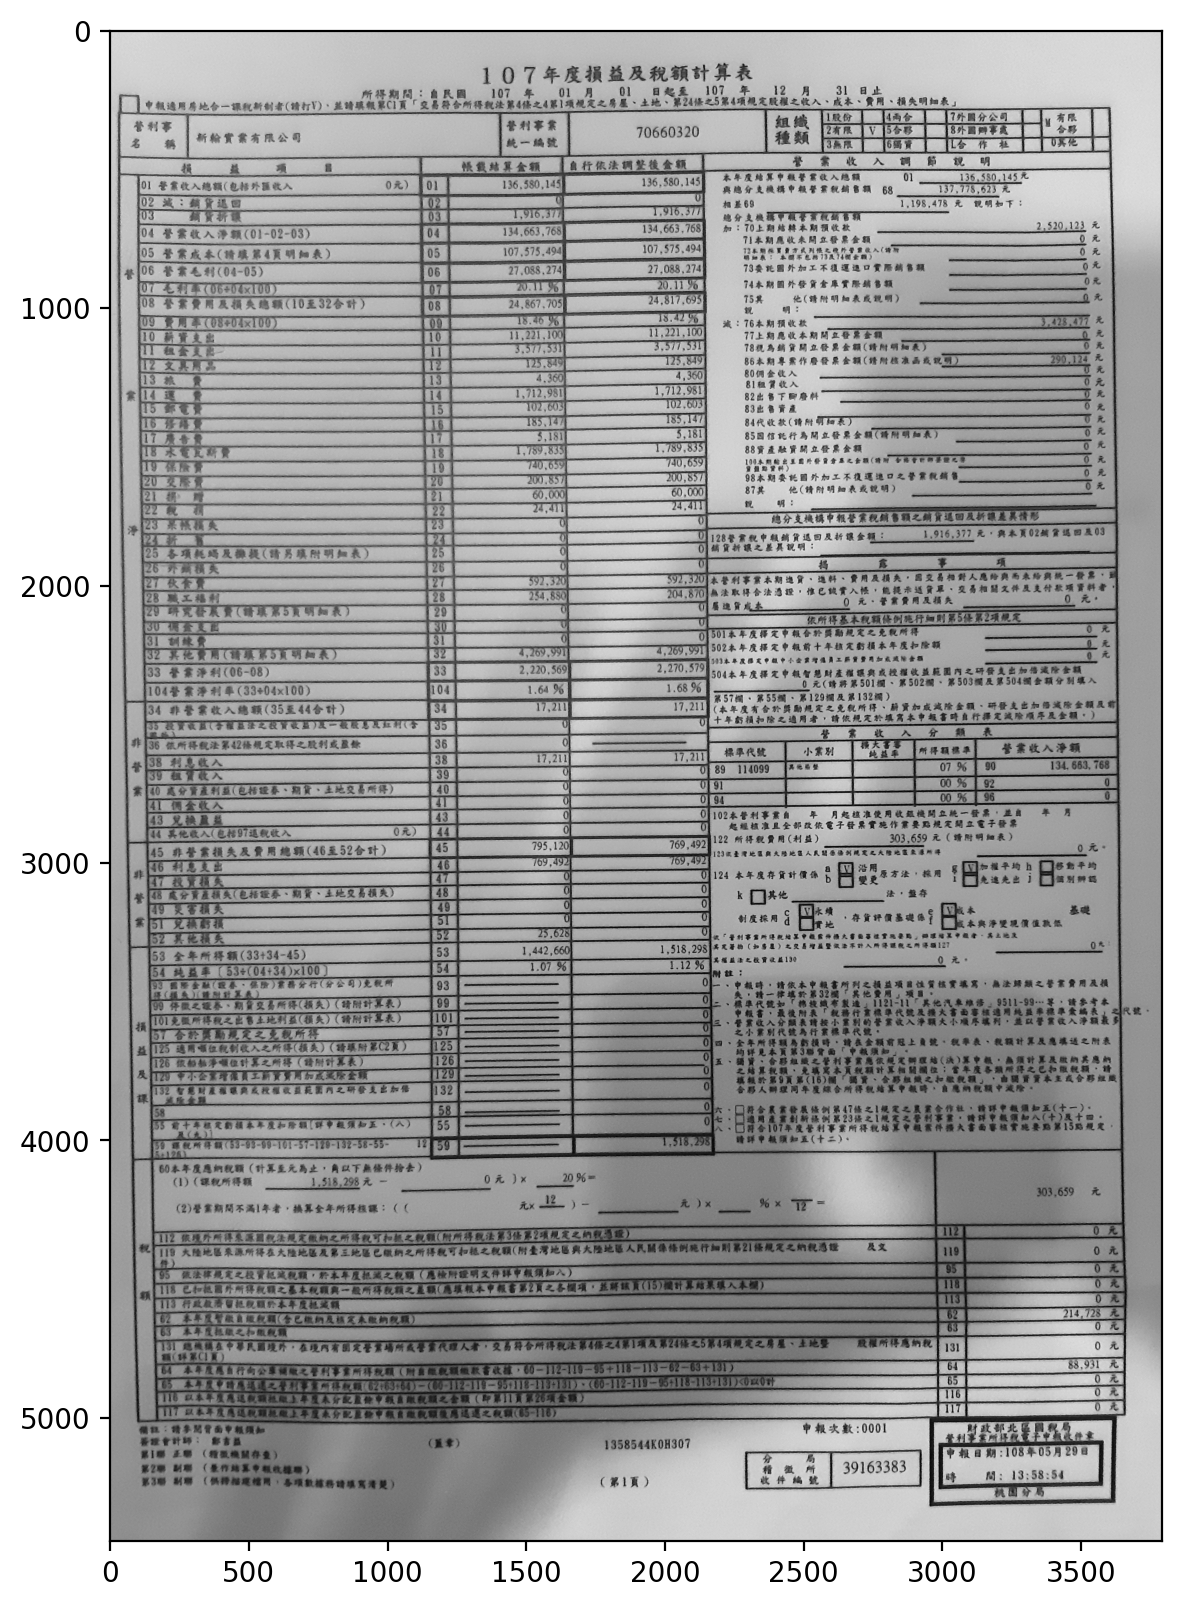

In [4]:
ocr_tool.show_image(img)

In [5]:
correctExposure = CorrectExposure(img)
correct_img = correctExposure.fit()

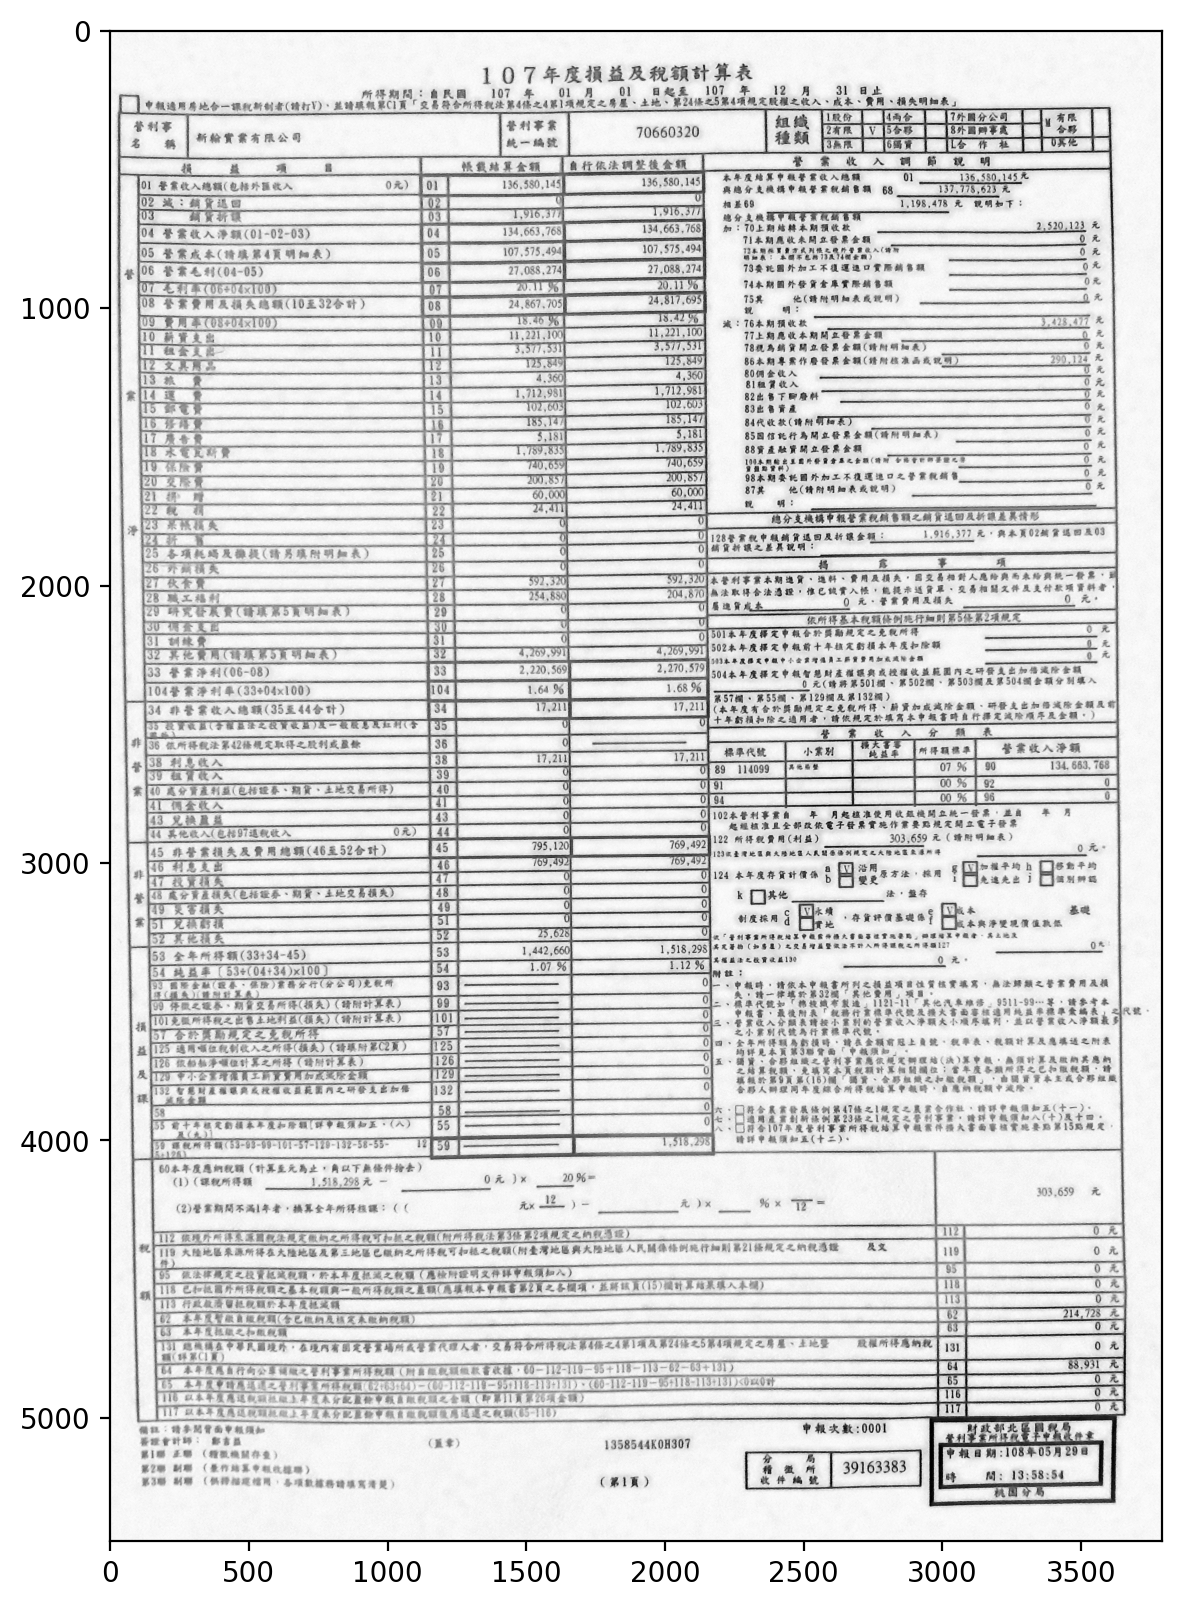

In [6]:
ocr_tool.show_image(correct_img)

# 全圖片處理

In [7]:
import os
import cv2 as cv
import pandas as pd
import numpy as np
from detect_exposure import DetectExposure

In [8]:
directory_name = '../image'
df = pd.DataFrame(columns = ['image_path', 'image', 'type'])
for filename in os.listdir(r"./" + directory_name):
    next_directory_name = '../image/' + str(filename)
    for next_filename in os.listdir(r"./" +  next_directory_name):
        df.loc[len(df)] = ['../image/' + str(filename) + '/' + str(next_filename), next_filename.replace('.jpg',''), str(filename)]
df['is_blurry'] = df['image'].apply(lambda x: False if x[-1:]!='b' else True)
#排除模糊圖片
df = df[~df['is_blurry']]
df = df.reset_index(drop = True)
df = df.drop('is_blurry',axis = 1)

In [9]:
#做全二質化
for i in range(len(df)):
    image_path = df.loc[i]['image_path']
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    ce = CorrectExposure(img)
    img = ce.fit()
    img = ocr_tool.mid(img)
    cv.imwrite('./all_correct/' + str(i+1) + '_' + str(df.loc[i]['image']) + '.jpg',img)